<a href="https://colab.research.google.com/github/amatchison/CS4410/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#download nltk packages
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
#download Hamlet
!pip install requests
import requests
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text


In [44]:
#create TextBlob
from textblob import TextBlob
blob = TextBlob(data)

In [45]:
#get word frequencies
items = blob.word_counts.items()

In [46]:
#eliminate stop words
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
items = [item for item in items if item[0] not in stopwords]

In [47]:
#sort words by frequency
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [48]:
#get top 20 words
top20 = sorted_items[1:21]

In [49]:
#create dataframe
import pandas as pd
df = pd.DataFrame(top20, columns=['word','count'])

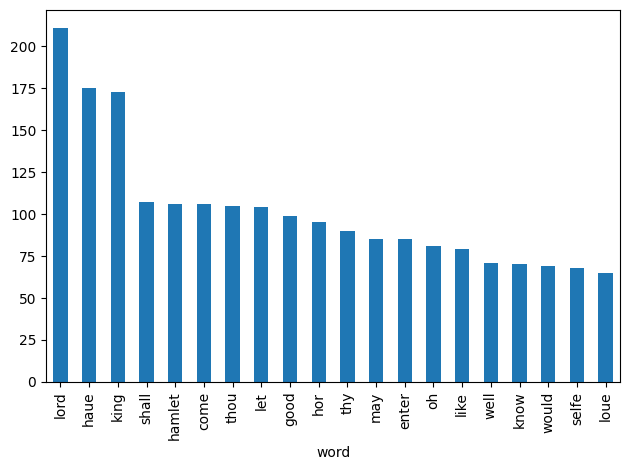

In [50]:
#create bar graph
axes = df.plot.bar(x='word', y='count', legend=False)
import matplotlib.pyplot as plt
plt.gcf().tight_layout()

In [51]:
#import mask_oval.png
import imageio.v2 as imageio
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

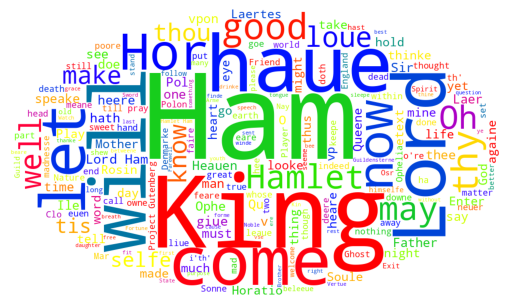

In [53]:
#create wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(data)
plt.axis('off')
plt.imshow(wordcloud)